In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2
from sklearn.model_selection import train_test_split

In [ ]:
car_data = pd.read_csv("/content/drive/MyDrive/Datasets/cleaned_car_data.csv")

In [ ]:
car_data = car_data.drop(columns = {"Unnamed: 0"})

In [ ]:
car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           274 non-null    int64  
 1   Selling_Price  274 non-null    float64
 2   Present_Price  274 non-null    float64
 3   Kms_Driven     274 non-null    int64  
 4   Fuel_Type      274 non-null    object 
 5   Seller_Type    274 non-null    object 
 6   Transmission   274 non-null    object 
 7   Owner          274 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 17.2+ KB


In [ ]:
car_data["Owner"] = car_data["Owner"].astype("object")

In [ ]:
car_data.shape

(274, 8)

In [ ]:
X = car_data[["Year" , "Present_Price" , "Kms_Driven" , "Fuel_Type" , "Seller_Type" , "Transmission" , "Owner"]]
y = car_data[["Selling_Price"]]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , shuffle = True , random_state = 1)

In [ ]:
print("X_train.shape : " , X_train.shape)
print("X_test.shape : " , X_test.shape)
print("y_train.shape : " , y_train.shape)
print("y_test.shape : " , y_test.shape)

X_train.shape :  (205, 7)
X_test.shape :  (69, 7)
y_train.shape :  (205, 1)
y_test.shape :  (69, 1)


<h3>Feature Engineering</h3>
<h4>Checking For NaN Values</h4>

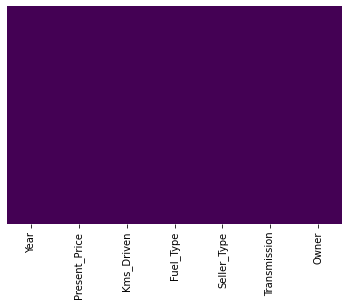

In [ ]:
sns.heatmap(X.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

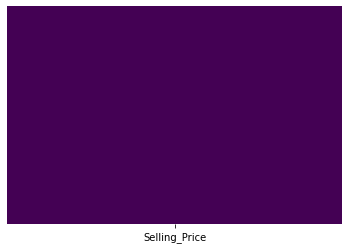

In [ ]:
sns.heatmap(y.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

<h4>Count/Frequency Encoding</h4>

In [ ]:
for i in car_data.columns:
  if car_data[i].dtype == "object":
    print(i,":",len(car_data[i].unique()),"labels")
  else:
    continue

Fuel_Type : 3 labels
Seller_Type : 2 labels
Transmission : 2 labels
Owner : 2 labels


In [ ]:
# def count_encoding(data , excluding_cols = []):
#   feature_dict = {}
#   for i in data.columns:
#     if (data[i].dtype == "object") and (i not in excluding_cols):
#       feature_dict.update(data[i].value_counts().to_dict())
#       data[i] = data[i].map(data[i].value_counts().to_dict())
#       data[i] = data[i].astype("object")     
#     else:
#       continue
#   return data , feature_dict

In [ ]:
# _ , feature_dict = count_encoding(X_train , excluding_cols = ["Owner"])
# feature_dict

In [ ]:
# X_train , feature_dict = count_encoding(X_train , excluding_cols = ["Owner"])
# X_test = X_test.replace(feature_dict)

In [ ]:
# X_test["Fuel_Type"] = X_test["Fuel_Type"].map(feature_dict)

In [ ]:
train_fuel_map = X_train["Fuel_Type"].value_counts().to_dict()
train_seller_map = X_train["Seller_Type"].value_counts().to_dict()
train_transmission_map = X_train["Transmission"].value_counts().to_dict()

# test_fuel_map = X_test["Fuel_Type"].value_counts().to_dict()
# test_seller_map = X_test["Seller_Type"].value_counts().to_dict()
# test_transmission_map = X_test["Transmission"].value_counts().to_dict()

In [ ]:
X_train["Fuel_Type"] = X_train["Fuel_Type"].map(train_fuel_map)
X_train["Seller_Type"] = X_train["Seller_Type"].map(train_seller_map)
X_train["Transmission"] = X_train["Transmission"].map(train_transmission_map)

X_test["Fuel_Type"] = X_test["Fuel_Type"].map(train_fuel_map)
X_test["Seller_Type"] = X_test["Seller_Type"].map(train_seller_map)
X_test["Transmission"] = X_test["Transmission"].map(train_transmission_map)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
190,2016,4.43,15000,171,128,185,0
134,2017,0.54,8600,171,77,185,0
48,2009,15.04,70000,171,128,20,0
171,2011,0.57,35000,171,77,185,1
33,2014,9.95,45000,33,128,185,0


In [ ]:
X_test.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
58,2011,12.48,45000,33,128,185,0
101,2009,1.75,40000,171,77,185,0
186,2011,6.79,31604,171,128,185,0
116,2013,1.20,32000,171,77,185,0
11,2015,10.38,51000,33,128,185,0


<h3>Featrue Selection</h3>
<h4>Chi-Square Test</h4>

In [ ]:
def chi2_evaluation(col1 , col2 , alpha = 0.05):
    dataset_table = pd.crosstab(col1 , col2)
    observed_values = dataset_table.values
    val = stats.chi2_contingency(dataset_table)
    expected_values = val[3]
    no_of_rows = len(dataset_table.iloc[: , 0])
    no_of_cols = len(dataset_table.iloc[0 , :])
    ddof = (no_of_rows - 1) * (no_of_cols - 1)
    chi_square = sum([(o - e) ** 2. / e for o , e in zip(observed_values , expected_values)])
    chi_square_statistic = sum(chi_square)
    critical_value = chi2.ppf(q = 1 - alpha , df = ddof)
    p_value = 1 - chi2.cdf(x = chi_square_statistic , df = ddof)

    if chi_square_statistic>=critical_value:
      print("Reject H0,There is a relationship between 2 categorical variables")
    else:
      print("Retain H0,There is no relationship between 2 categorical variables")
    if p_value<=alpha:
      print("Reject H0,There is a relationship between 2 categorical variables")
    else:
      print("Retain H0,There is no relationship between 2 categorical variables")
    
    print("------------------\n")
    print("p-value : " ,p_value)
    print("Degrees of freedom : " ,ddof)
    print("Significance level : " , alpha)
    print("observed values : \n"  , observed_values)
    print("expected values : \n"  , expected_values)

In [ ]:
chi2_evaluation(X_train["Transmission"] , X_train["Seller_Type"])

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables
------------------

p-value :  0.8125816827327539
Degrees of freedom :  1
Significance level :  0.05
observed values : 
 [[  8  12]
 [ 69 116]]
expected values : 
 [[  7.51219512  12.48780488]
 [ 69.48780488 115.51219512]]


In [ ]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
190,2016,4.43,15000,171,128,185,0
134,2017,0.54,8600,171,77,185,0
48,2009,15.04,70000,171,128,20,0
171,2011,0.57,35000,171,77,185,1
33,2014,9.95,45000,33,128,185,0


In [ ]:
y_train.head()

,Selling_Price
190,3.15
134,0.48
48,3.60
171,0.15
33,6.00


<h4>ANOVA Test</h4>

In [ ]:
def anova_evaluation(categorical_col , continuous_col , alpha = 0.05):
  df_anova = pd.concat([categorical_col , continuous_col] , axis = 1)
  groups = pd.unique(categorical_col.values)
  d_data = {group : df_anova[continuous_col.name][df_anova[categorical_col.name] == group] for group in groups}
  col_list = []
  for i in categorical_col.unique():
    col_list.append(d_data[i])
  F, p = stats.f_oneway(*col_list)
  print("p-value : " , p)
  print("significance value : " , alpha)
  print("\n-------------------")
  if p < alpha:
    return "Rejecting Null Hypothesis.There is a relationship between these two columns."
  else:
    return "Accepting Null Hypothesis.There is no relationship between these two columns."

In [ ]:
anova_evaluation(X_train["Fuel_Type"] , y_train["Selling_Price"])

p-value :  8.339670761603943e-14
significance value :  0.05

-------------------


'Rejecting Null Hypothesis.There is a relationship between these two columns.'

In [ ]:
anova_evaluation(X_train["Seller_Type"] , y_train["Selling_Price"])

p-value :  5.615726813696553e-42
significance value :  0.05

-------------------


'Rejecting Null Hypothesis.There is a relationship between these two columns.'

In [ ]:
anova_evaluation(X_train["Transmission"] , y_train["Selling_Price"])

p-value :  0.8505366211698379
significance value :  0.05

-------------------


'Accepting Null Hypothesis.There is no relationship between these two columns.'

In [ ]:
anova_evaluation(X_train["Owner"] , y_train["Selling_Price"])

p-value :  0.04442798830769734
significance value :  0.05

-------------------


'Rejecting Null Hypothesis.There is a relationship between these two columns.'

Transformation ----> drop


<h4>Mutual Information/Information Gain</h4>

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0) , y_train)  # we have to assure that all of the nan values are filled with some values
mutual_info

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.12633298, 1.28495937, 0.16774545, 0.11769321, 0.57657206,
       0.01820272, 0.07453985])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info = mutual_info.sort_values(ascending = False)
mutual_info

Present_Price    1.284959
Seller_Type      0.576572
Kms_Driven       0.167745
Year             0.126333
Fuel_Type        0.117693
Owner            0.074540
Transmission     0.018203
dtype: float64

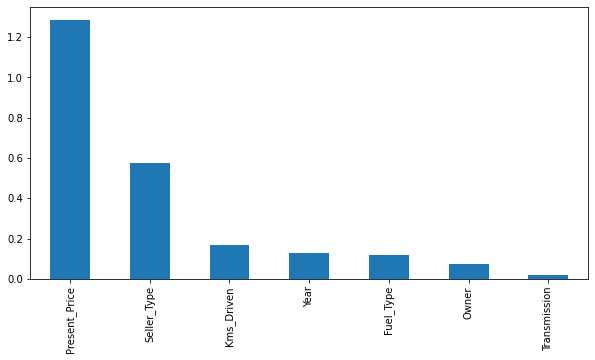

In [ ]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (10 , 5))

In [ ]:
X_train = X_train.drop(labels = ["Transmission" , "Owner"] , axis = 1)
X_test = X_test.drop(labels = ["Transmission" , "Owner"] , axis = 1)

In [ ]:
# X_train.to_csv("/content/drive/MyDrive/Datasets/car-data/x_train.csv")
# X_test.to_csv("/content/drive/MyDrive/Datasets/car-data/x_test.csv")
# y_train.to_csv("/content/drive/MyDrive/Datasets/car-data/y_train.csv")
# y_test.to_csv("/content/drive/MyDrive/Datasets/car-data/y_test.csv")